In [147]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Replace this line with your own local file path
df = pd.read_csv("D:/School/CS 4661 Data Science/NFL_Play_Prediction/NFL Play by Play 2009-2017 (v4).csv")

df = df[['Drive', 'down', 'qtr', 'yrdline100', 'ydstogo', 'FirstDown', 'PassOutcome', 'PlayType', 'PassLength']]
df = df.dropna()

df = df.replace({'PassOutcome': {'Complete': 1, 'Incomplete Pass': 0}})
df = df.replace({'PassLength' : {'Short' : 0, 'Deep' : 1}})

# We only want to take in PlayType: 'Pass' into account, dropping all the others
df = df.replace({'PlayType' : {'No Play': np.nan, 'Punt': np.nan, 'Sack': np.nan, 'Kickoff': np.nan, 'Run': np.nan, 'Half End': np.nan}})

df = df.dropna()

# Code to determine what other types there were for PlayType
#list = []
#for x in df['PlayType']:
#    if x not in list:
#        list.append(x)
#print(list)

X = df[['Drive', 'down', 'qtr', 'yrdline100', 'ydstogo', 'FirstDown', 'PassLength']]

X.head()

C:\Users\blippinBloop\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (25,51) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Drive,down,qtr,yrdline100,ydstogo,FirstDown,PassLength
1,1,1.0,1,58.0,10,0.0,0
3,1,3.0,1,56.0,8,0.0,1
6,2,2.0,1,98.0,10,0.0,0
9,3,1.0,1,43.0,10,0.0,0
10,3,2.0,1,40.0,7,1.0,0


In [148]:
# PassOutcome
y = df['PassOutcome']

y.head()

1     1
3     0
6     1
9     1
10    1
Name: PassOutcome, dtype: int64

In [149]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)

In [150]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate KNeighborsClassifer as knn
k = 3
knn = KNeighborsClassifier(n_neighbors=k)

# Train on the training set
knn.fit(X_train, y_train)

# Predict from training set
y_predict_KNN = knn.predict(X_test)

# Accuracy
accuracy_knn = accuracy_score(y_test, y_predict_KNN)

print(accuracy_knn)

0.6541947537175894


In [151]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate DecisionTreeClassifer
decisionTree = DecisionTreeClassifier(random_state = 5)

# Train
decisionTree.fit(X_train, y_train)

# Predict
y_predict_DTree = decisionTree.predict(X_test)

# Accuracy
accuracy_DTree = accuracy_score(y_test, y_predict_DTree)

print(accuracy_DTree)

0.6649498851271176


In [152]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

#Instantiate LogisticRegression
logReg = LogisticRegression()

# Train
logReg.fit(X_train, y_train)

# Predict
y_predict_LogReg = logReg.predict(X_test)

# Accuracy
accuracy_LogReg = accuracy_score(y_test, y_predict_LogReg)

print(accuracy_LogReg)

0.7276124113206595


In [153]:
y_predict_prob_dt = knn.predict_proba(X_test)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_predict_prob_dt[:,1], pos_label=1)
AUC_dt = auc(fpr_dt, tpr_dt)

y_predict_prob_rf = decisionTree.predict_proba(X_test)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_predict_prob_rf[:,1], pos_label=1)
AUC_rf = auc(fpr_rf, tpr_rf)

y_predict_prob_lr = logReg.predict_proba(X_test)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_predict_prob_lr[:,1], pos_label=1)
AUC_lr = auc(fpr_lr, tpr_lr)

print(AUC_dt)
print(AUC_rf)
print(AUC_lr)



0.6743061369364939
0.6833455671121074
0.7905062990880036


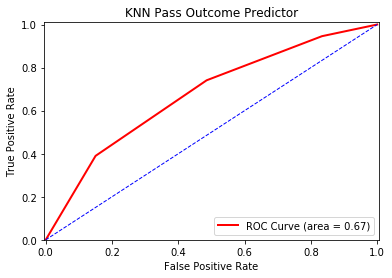

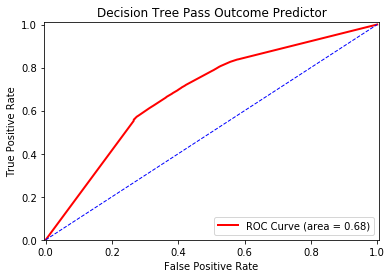

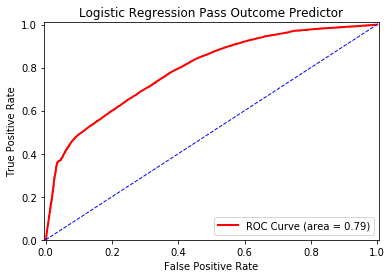

In [155]:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr_dt, tpr_dt, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC_dt)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN Pass Outcome Predictor')
plt.legend(loc="lower right")

plt.show()

# Roc Curve:
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC_rf)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Pass Outcome Predictor')
plt.legend(loc="lower right")

plt.show()

# Roc Curve:
plt.plot(fpr_lr, tpr_lr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC_lr)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression Pass Outcome Predictor')
plt.legend(loc="lower right")

plt.show()